In [7]:
# Load the token

import qiskit
from qiskit import IBMQ
import os
API_TOKEN = os.environ.get('IBM_Q_TOKEN')
IBMQ.save_account(API_TOKEN)

In [11]:
# Check version

qiskit.__version__

'0.9.0'

In [16]:
# Check versions of all qiskit elements

qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

## ELEMENTS

> AER:  handles simulator backends

In [14]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()



Total count for 00 and 11 are: {'00': 501, '11': 499}


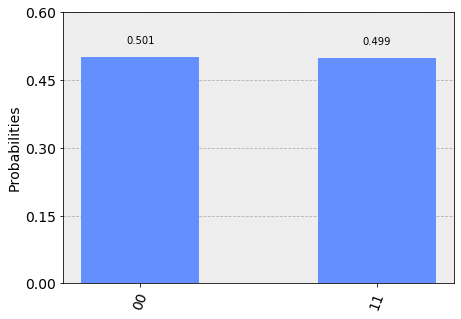

In [15]:
# Plot a histogram
plot_histogram(counts)
